In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
import zipfile
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Dog_cat_data/dogs-vs-cats.zip")
zip_ref.extractall("cat_dog_dataset")
zip_ref.close()

In [1]:
import zipfile
zip_ref = zipfile.ZipFile("/content/cat_dog_dataset/train.zip")
zip_ref.extractall("cat_dog_traing_unzip")
zip_ref.close()

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
##reading all images
import cv2
import os
import numpy as np


dataset=[]
filenames=[]

def load_images_from_folder(folder):
    dim = (128,128)
    images = []
    filenames=[]
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        #img= img.astype(np.uint8)
        img= cv2.resize(img,dim, interpolation = cv2.INTER_AREA)
        if img is not None:
            images.append(img)
            filenames.append(filename)
    return filenames,images
  
filenames,dataset= load_images_from_folder('/content/cat_dog_traing_unzip/train')

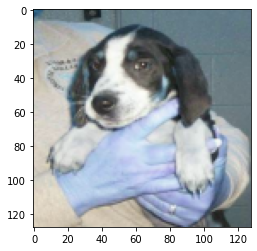

In [4]:
import matplotlib
matplotlib.pyplot.imshow(dataset[8000])

In [5]:
import numpy as np

training_data= np.asarray(dataset)

labels=[]


for i in range(len(filenames)):
  if "cat" in filenames[i]:
      labels.append(int(0))
  else:
      labels.append(int(1))  
      
Y= np.asarray(labels)
Y.shape

(25000,)

In [6]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

X=training_data
Y=Y
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [7]:
y_train.shape

(20000,)

In [8]:
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout

In [9]:
from tensorflow.keras.callbacks import EarlyStopping
earlyStopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [12]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# model.add(Dense(128, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid')) # 2 because we have cat and dog classes

#model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 batch_normalization_8 (Batc  (None, 126, 126, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 63, 63, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 batch_normalization_9 (Batc  (None, 61, 61, 32)      

In [13]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
from tensorflow.keras.callbacks import EarlyStopping
earlyStopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [15]:
model.fit(x=X_train, y=y_train, epochs=30, validation_data=(X_test, y_test), batch_size=64, callbacks=[earlyStopping], shuffle=True)

Epoch 1/30
313/313 [==============================] - 31s 61ms/step - loss: 0.6659 - accuracy: 0.6600 - val_loss: 0.5533 - val_accuracy: 0.7222
Epoch 2/30
313/313 [==============================] - 18s 58ms/step - loss: 0.5089 - accuracy: 0.7454 - val_loss: 0.6446 - val_accuracy: 0.6768
Epoch 3/30
313/313 [==============================] - 18s 56ms/step - loss: 0.4269 - accuracy: 0.8049 - val_loss: 0.5843 - val_accuracy: 0.7400
Epoch 4/30
313/313 [==============================] - 18s 57ms/step - loss: 0.3822 - accuracy: 0.8260 - val_loss: 0.6852 - val_accuracy: 0.7100
Epoch 5/30
313/313 [==============================] - 17s 54ms/step - loss: 0.3431 - accuracy: 0.8487 - val_loss: 0.3498 - val_accuracy: 0.8500
Epoch 6/30
313/313 [==============================] - 18s 57ms/step - loss: 0.3021 - accuracy: 0.8699 - val_loss: 0.3664 - val_accuracy: 0.8422
Epoch 7/30
313/313 [==============================] - 18s 57ms/step - loss: 0.2719 - accuracy: 0.8834 - val_loss: 0.4056 - val_accuracy:

In [16]:
model.evaluate(x=X_test, y=y_test)

157/157 [==============================] - 1s 6ms/step - loss: 0.2648 - accuracy: 0.8946


[0.26475945115089417, 0.894599974155426]

In [17]:
model.save("cat_dog_Pre_trained_Efficinetnet0_CLF_Amin_Rahmani0.h5")

In [ ]:
!git lfs install
!git clone https://huggingface.co/Aminrhmni/cataract_CLF_Pretrained_Resnet

Error: Failed to call git rev-parse --git-dir: exit status 128 
Git LFS initialized.
Cloning into 'cataract_CLF_Pretrained_Resnet'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 10 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (10/10), 1.25 KiB | 641.00 KiB/s, done.
Filtering content: 100% (2/2), 418.41 MiB | 69.24 MiB/s, done.


In [19]:
import cv2
import os
import numpy as np
from tensorflow.keras.models import load_model
import tensorflow as tf
import pandas as pd

from keras.utils.data_utils import get_file

#loading model


#آدرس مدل را نیز اینجا وارد کنید
model= load_model("/content/cat_dog_Pre_trained_Efficinetnet0_CLF_Amin_Rahmani0.h5",compile=True)

def load_images_from_folder(folder):
    dim = (128,128)
    images = []
    filenames=[]
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        #img= img.astype(np.uint8)
        img= cv2.resize(img,dim, interpolation = cv2.INTER_AREA)
        img=np.reshape(img, (1, 128, 128, 3))
        if img is not None:
            images.append(img)
            filenames.append(filename)
    return filenames,images

## آدرس پوشه عکس ها را اینجا وارد کنید
filenames,images=load_images_from_folder("/content/test")
p_labels=[]

# این قسمت پریدیکت را انجام میدهد
for i in range (len(images)):
  predicted_label=model.predict(images[i],batch_size=None)
  
  if(predicted_label[0]>0.5):
    p_labels.append("dog")
  else: 
    p_labels.append('cat')  


Predicted_list = pd.DataFrame(
    {'Filnames':filenames ,
     'Predicted_Labels':p_labels ,
    })
Predicted_list.to_csv("Predicted_labels.csv")


1/1 [==============================] - 0s 27ms/step


In [25]:
import numpy as np
trainableParams = np.sum([np.prod(v.get_shape()) for v in model.trainable_weights])
nonTrainableParams = np.sum([np.prod(v.get_shape()) for v in model.non_trainable_weights])
totalParams = trainableParams + nonTrainableParams

print(trainableParams)
print(nonTrainableParams)
print(totalParams)

12940801
1472
12942273
